In [63]:
import numpy as np
%load_ext autoreload
%autoreload 2
import torch
import torch.nn as nn
import torch.optim as optim
from script.tools import tools
from script.collection import Parameter as pmt
import sys
print(sys.executable)
import net
import os
from script.tools import collection
xlst = []
ylst = []
xylst = []
keys = []
expect = ['Seed','key','default']

x = np.linspace(-1, 1, 100)
y = 2 * x**2 + 3 * x + 1

# 转换为张量
x_tensor = torch.from_numpy(x).unsqueeze(1).float()
y_tensor = torch.from_numpy(y).unsqueeze(1).float()
print(x_tensor.size(),y_tensor.size())
#x_ytensor = torch.tensor(xylst,dtype=torch.float)


# 计算均值和标准差
x_mean = x_tensor.mean(dim=0)
x_std = x_tensor.std(dim=0)
y_mean = y_tensor.mean(dim=0)
y_std = y_tensor.std(dim=0)

# 归一化 x 和 y
normalized_x = (x_tensor - x_mean) / x_std
normalized_y = (y_tensor - y_mean) / y_std
#print("x_mean: ",x_mean)
#print("x_std: ",x_std)
#print("y_mean: ",y_mean)
#print("y_std: ",y_std)
#print(x_tensor[0])
#print(keys)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/opt/homebrew/anaconda3/bin/python
torch.Size([100, 1]) torch.Size([100, 1])


In [68]:
model = net.DeepNet(1,10,1,1)
criterion = nn.MSELoss()

In [69]:
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
# 自定义数据集类
class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

# dataset = CustomDataset(x_tensor, y_tensor)
dataset = CustomDataset(normalized_x, normalized_y)



#optimizer = optim.SGD(model.parameters(), lr=0.001)




In [73]:
batch_size = 5
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
num_epochs = 25000

loss_history = []
for epoch in range(num_epochs):
    total_loss = 0.0
    i = 0
    for batch_x, batch_y in dataloader:
        #print(batch_x,batch_x)
        #i = i +1
        #print(batch_x,"\n",batch_y)
        #print("zzzzzzz")
        # 前向传播
        outputs = model(batch_x)
        #print("batch_x",batch_x[0],"\n outputs: ",outputs[0])
        loss = criterion(outputs, batch_y)
        i = i +1
        if i == -1:
            print("i=------"+str(i),"\n outputs: ",outputs,"\n y:",batch_y)
        total_loss += loss.item()

        #print("loss:",loss.item(),"batch_x: ",batch_x," outputs ",outputs," batch_y: ",batch_y)
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    #loss_history.append(total_loss)
    # 打印训练信息
    if (epoch+1) % 10 == 0:
        average_loss = total_loss / len(dataloader)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.10f}')



Epoch [10/25000], Loss: 0.0008313707
Epoch [20/25000], Loss: 0.0008316518
Epoch [30/25000], Loss: 0.0008307080
Epoch [40/25000], Loss: 0.0008265603
Epoch [50/25000], Loss: 0.0008298850
Epoch [60/25000], Loss: 0.0008269711
Epoch [70/25000], Loss: 0.0008269826
Epoch [80/25000], Loss: 0.0008248526
Epoch [90/25000], Loss: 0.0008226100
Epoch [100/25000], Loss: 0.0008254997
Epoch [110/25000], Loss: 0.0008281033
Epoch [120/25000], Loss: 0.0008206762
Epoch [130/25000], Loss: 0.0008206390
Epoch [140/25000], Loss: 0.0008220540
Epoch [150/25000], Loss: 0.0008178450
Epoch [160/25000], Loss: 0.0008158001
Epoch [170/25000], Loss: 0.0008170111
Epoch [180/25000], Loss: 0.0008165058
Epoch [190/25000], Loss: 0.0008212091
Epoch [200/25000], Loss: 0.0008145857
Epoch [210/25000], Loss: 0.0008216126
Epoch [220/25000], Loss: 0.0008135606
Epoch [230/25000], Loss: 0.0008106393
Epoch [240/25000], Loss: 0.0008130531
Epoch [250/25000], Loss: 0.0008119296
Epoch [260/25000], Loss: 0.0008111611
Epoch [270/25000], Lo

mean : tensor([1.6801])  std tensor([1.8615])
 out without normalization tensor([-0.2525], grad_fn=<AddBackward0>)
x= tensor([0.1111]) y = tensor([1.3580])  out= tensor([1.2101], grad_fn=<AddBackward0>)
2x**2 +3*x +1 : tensor([0.3580])
rate  tensor([0.1089], grad_fn=<DivBackward0>)


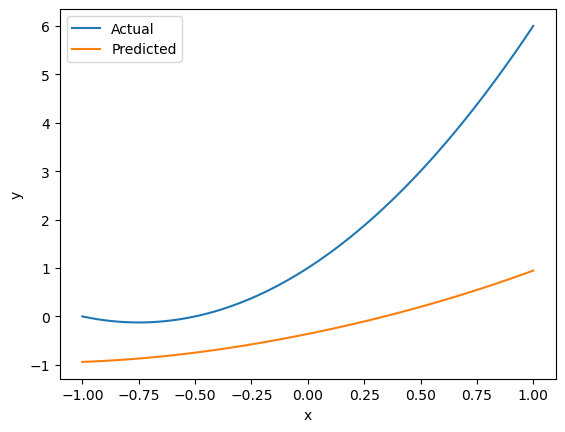

In [74]:
from matplotlib import pyplot as plt


def test(m,x,y,mean,std):
    print("mean :",mean," std",std)
    out = m(x)
    print(" out without normalization",out)
    out = out * std + mean
    print("x=",x ,"y =", y," out=",out)
    print("2x**2 +3*x +1 :",2*(x**2) + 3*x)
    print("rate ",(y-out)/y)
test(model,x_tensor[55],y_tensor[55],y_mean,y_std)
predicted = model(x_tensor).detach().numpy()
plt.plot(x, y, label='Actual')
plt.plot(x, predicted, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [16]:
result1 = []
result1 = collection.collection("collection/workspace",result1)

collection:  1070


In [48]:
#print(xlst[0])
print(len(xlst[0]))
tx = []
tx.append(keys)
i = 0
for y_ in ylst:
    x_ = xlst[i].copy()
    x_.append(y_[0])
    tx.append(x_)
    i = i + 1
print(tx[0])
tools.lst2excel(tx,"test.xlsx")

48
['PCIe_Lane_Bandwidth', 'PCIe_Lane_Count', 'SATA_Processing_Delay', 'Queue_Fetch_Size', 'Data_Cache_DRAM_Row_Size', 'Data_Cache_DRAM_Data_Rate', 'Data_Cache_DRAM_Data_Busrt_Size', 'Data_Cache_DRAM_tRCD', 'Data_Cache_DRAM_tCL', 'Data_Cache_DRAM_tRP', 'Overprovisioning_Ratio', 'GC_Exec_Threshold', 'Preferred_suspend_erase_time_for_read', 'Preferred_suspend_erase_time_for_write', 'Preferred_suspend_write_time_for_read', 'Flash_Channel_Count', 'Flash_Channel_Width', 'Channel_Transfer_Rate', 'Chip_No_Per_Channel', 'Page_Read_Latency_LSB', 'Page_Read_Latency_CSB', 'Page_Read_Latency_MSB', 'Page_Program_Latency_LSB', 'Page_Program_Latency_CSB', 'Page_Program_Latency_MSB', 'Block_Erase_Latency', 'Block_PE_Cycles_Limit', 'Suspend_Erase_Time', 'Suspend_Program_Time', 'Die_No_Per_Chip', 'Plane_No_Per_Die', 'Block_No_Per_Plane', 'Page_No_Per_Block', 'Page_Capacity', 'Page_Metadat_Capacity', 'Channel_IDs', 'Chip_IDs', 'Die_IDs', 'Plane_IDs', 'Initial_Occupancy_Percentage', 'Working_Set_Percentag

In [35]:
print(len(keys))

48
